### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset from xls

In [3]:
pokemon_data_csv = '/Users/vishalsaxena/Documents/DS_Workspace/ds_bootcamp/data/raw/pokemon.csv'
pokemon_data = pd.read_csv(pokemon_data_csv)
pokemon_data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [4]:
pokemon_data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [21]:
pokemon_data.iloc[2]

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                       100
base_egg_steps      

In [27]:
limited_column_pokemon_data = pokemon_data[['name', 'type1', 'type2', 'base_total', 'hp', 'attack', 'defense', 
                                            'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary']].copy()

In [28]:
limited_column_pokemon_data.rename(columns={
    'name':'Name',
    'type1':'Type 1',
    'type2': 'Type 2',
    'base_total': 'Total',
    'hp':'HP',
    'attack':'Attack',
    'defense':'Defense',
    'sp_attack':'Atk',
    'sp_defense':'Def',
    'speed':'Speed',
    'generation':'Stage',
    'is_legendary':'Legendary'
}, inplace=True)
limited_column_pokemon_data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Atk,Def,Speed,Stage,Legendary
0,Bulbasaur,grass,poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,grass,poison,405,60,62,63,80,80,60,1,0
2,Venusaur,grass,poison,625,80,100,123,122,120,80,1,0
3,Charmander,fire,NaN,309,39,52,43,60,50,65,1,0
4,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,steel,flying,570,97,101,103,107,101,61,7,1
797,Kartana,grass,steel,570,59,181,131,59,31,109,7,1
798,Guzzlord,dark,dragon,570,223,101,53,97,53,43,7,1
799,Necrozma,psychic,NaN,600,97,107,101,127,89,79,7,1


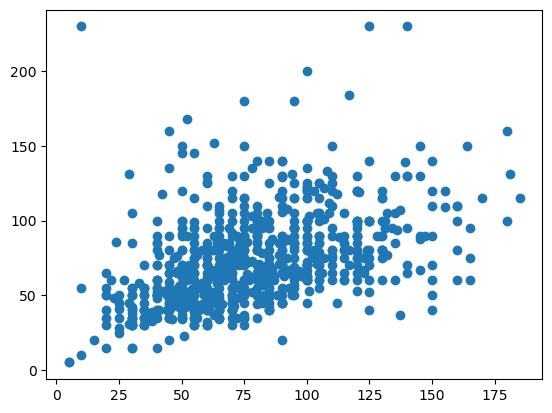

In [40]:
plt.scatter(limited_column_pokemon_data['Attack'], limited_column_pokemon_data['Defense'])

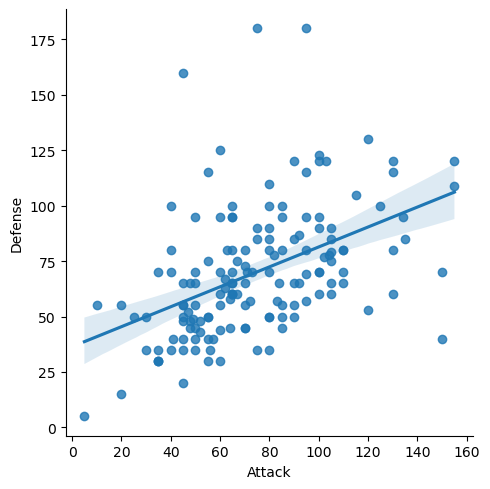

In [45]:
sns.lmplot(x='Attack', y='Defense', data=limited_column_pokemon_data[0:150])

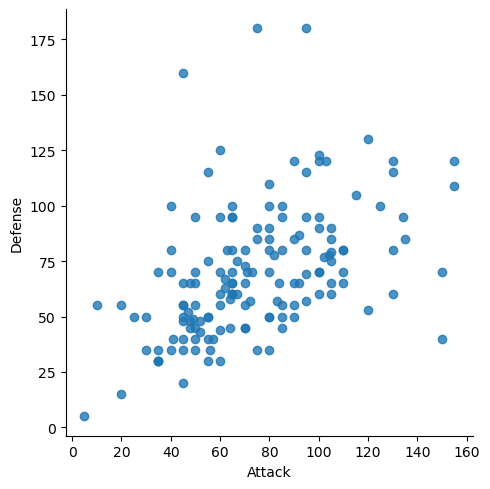

In [46]:
sns.lmplot(x='Attack', y='Defense', data=limited_column_pokemon_data[0:150], fit_reg=False) # without regression line

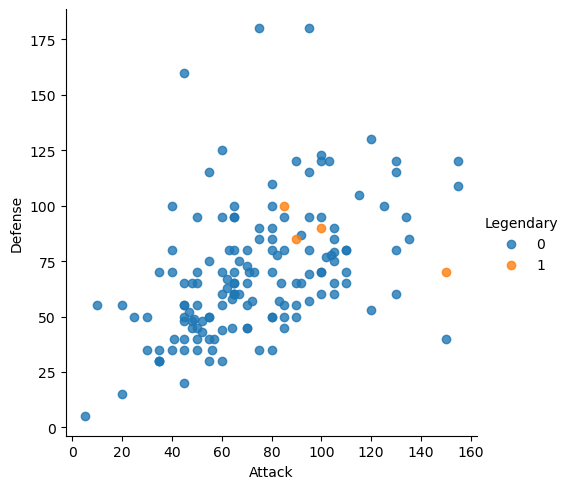

In [47]:
sns.lmplot(x='Attack', y='Defense', data=limited_column_pokemon_data[0:150], fit_reg=False, hue='Legendary')

In [49]:
limited_column_pokemon_data[0:150]['Legendary'].value_counts()

Legendary
0    146
1      4
Name: count, dtype: int64

### add_axes()

Text(0.5, 1.0, 'Inset')

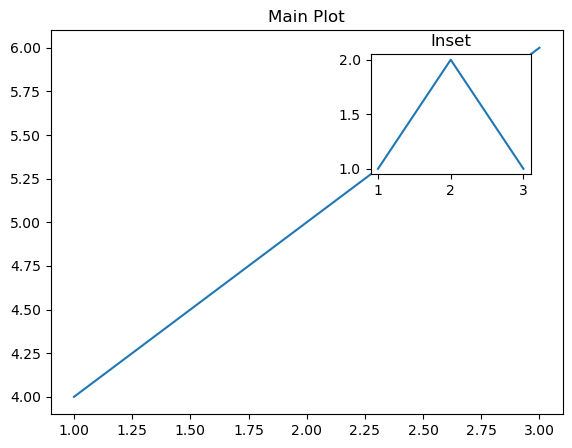

In [50]:
fig = plt.figure()

# Main plot
main_ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # big plot
main_ax.plot([1, 2, 3], [4, 5, 6])
main_ax.set_title("Main Plot")

# Inset plot (small plot inside)
inset_ax = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # small overlay plot
inset_ax.plot([1, 2, 3], [1, 2, 1])
inset_ax.set_title("Inset")

Text(0, 0.5, 'y-axis')

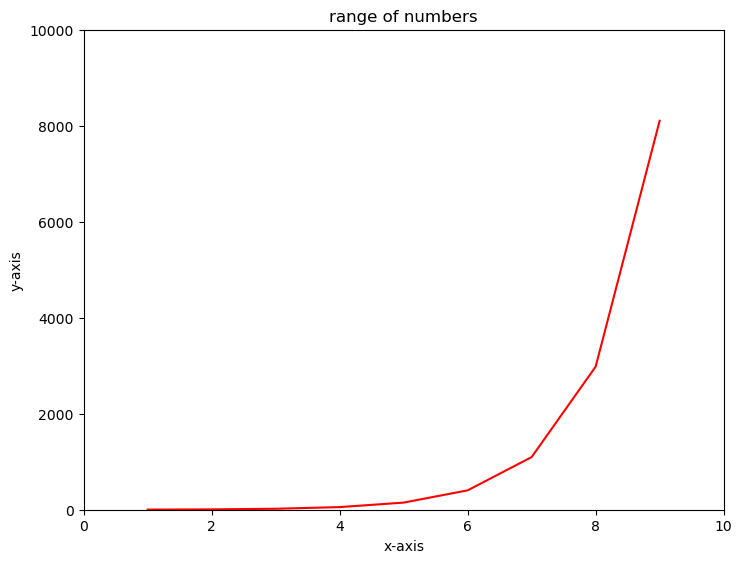

In [52]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])

x = np.arange(1,10)
a1.plot(x, np.exp(x), 'r')
a1.set_title('range of numbers')

# explicitly set x and y limits
plt.ylim(0,10000)
plt.xlim(0,10)

# explicitly set x and y label
plt.xlabel("x-axis")
plt.ylabel("y-axis")

<Axes: >

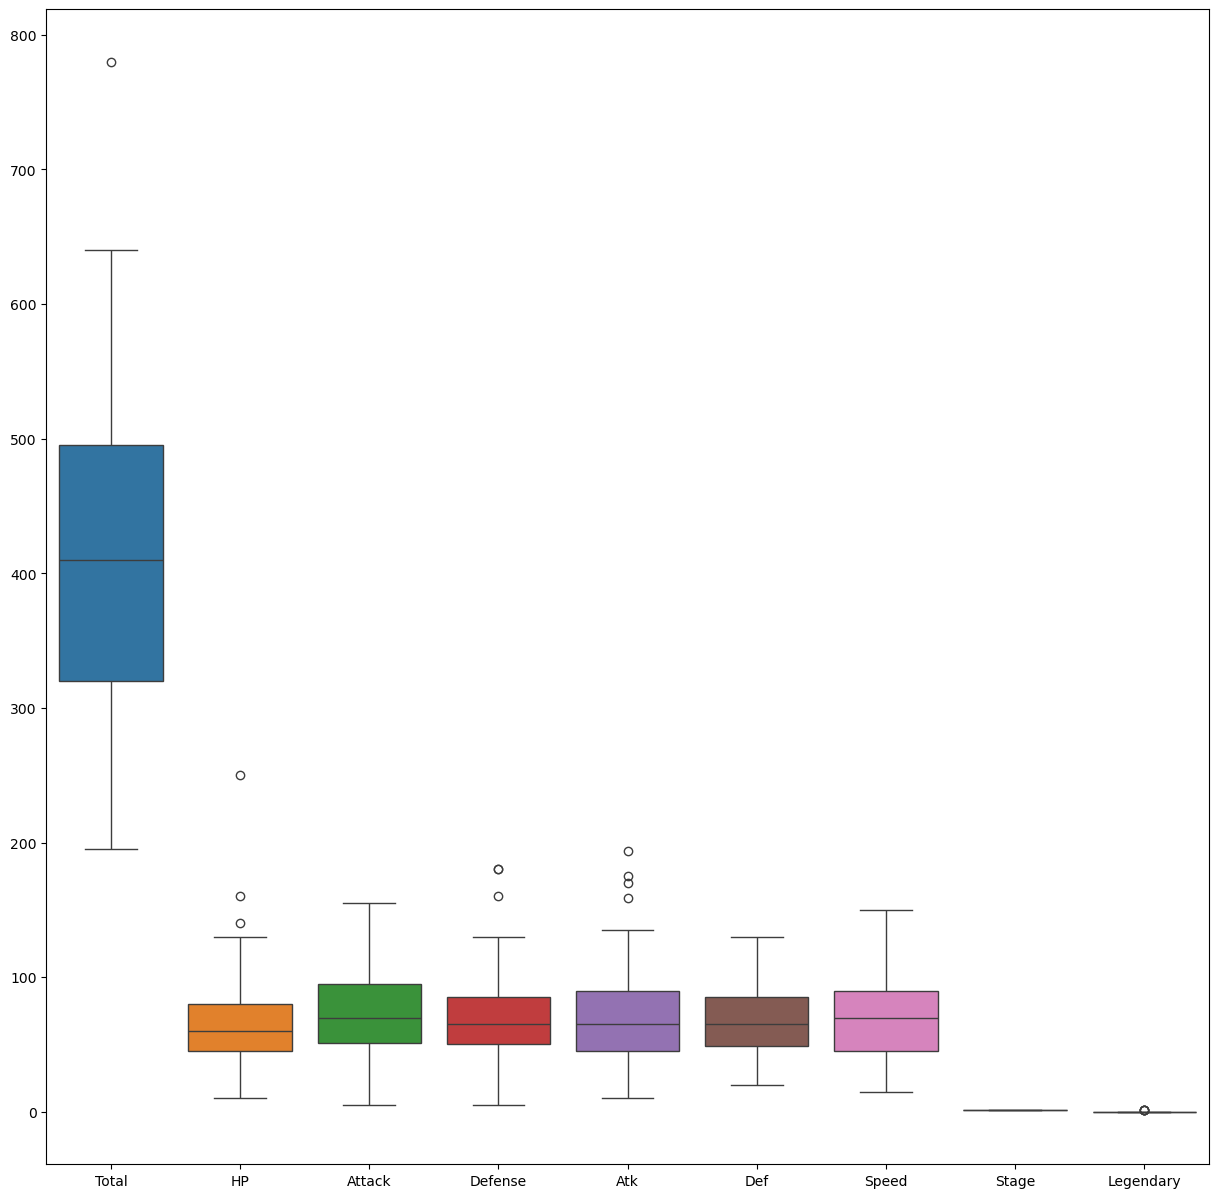

In [53]:
plt.figure(figsize=(15,15))
sns.boxplot(data=limited_column_pokemon_data[0:151])

In [54]:
limited_column_pokemon_data.drop(['Total', 'Legendary', 'Stage'], axis=1, inplace=True)
limited_column_pokemon_data

,Name,Type 1,Type 2,HP,Attack,Defense,Atk,Def,Speed
0,Bulbasaur,grass,poison,45,49,49,65,65,45
1,Ivysaur,grass,poison,60,62,63,80,80,60
2,Venusaur,grass,poison,80,100,123,122,120,80
3,Charmander,fire,NaN,39,52,43,60,50,65
4,Charmeleon,fire,NaN,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
796,Celesteela,steel,flying,97,101,103,107,101,61
797,Kartana,grass,steel,59,181,131,59,31,109
798,Guzzlord,dark,dragon,223,101,53,97,53,43
799,Necrozma,psychic,NaN,97,107,101,127,89,79


<Axes: >

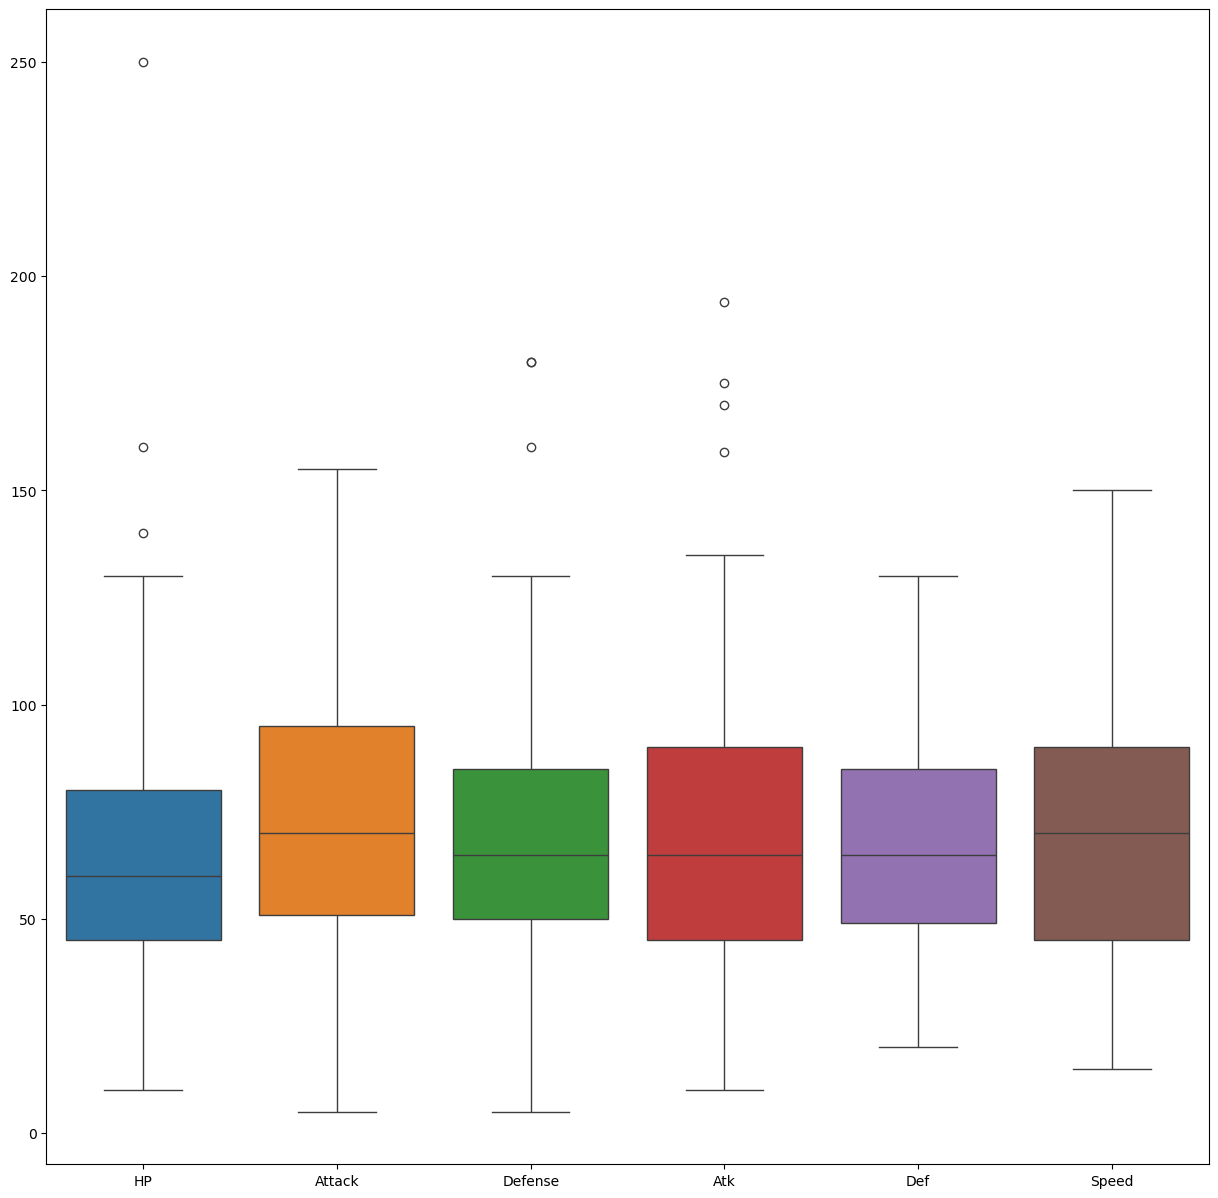

In [55]:
plt.figure(figsize=(15,15))
sns.boxplot(data=limited_column_pokemon_data[0:151])

In [62]:
corr = limited_column_pokemon_data[0:151].select_dtypes(include='number').corr()
corr

,HP,Attack,Defense,Atk,Def,Speed
HP,1.000000,0.310592,0.138954,0.240122,0.499438,-0.023155
Attack,0.310592,1.000000,0.464479,0.164601,0.441413,0.271059
Defense,0.138954,0.464479,1.000000,0.227216,0.211409,-0.033574
Atk,0.240122,0.164601,0.227216,1.000000,0.559186,0.428833
Def,0.499438,0.441413,0.211409,0.559186,1.000000,0.440359
Speed,-0.023155,0.271059,-0.033574,0.428833,0.440359,1.000000


<Axes: >

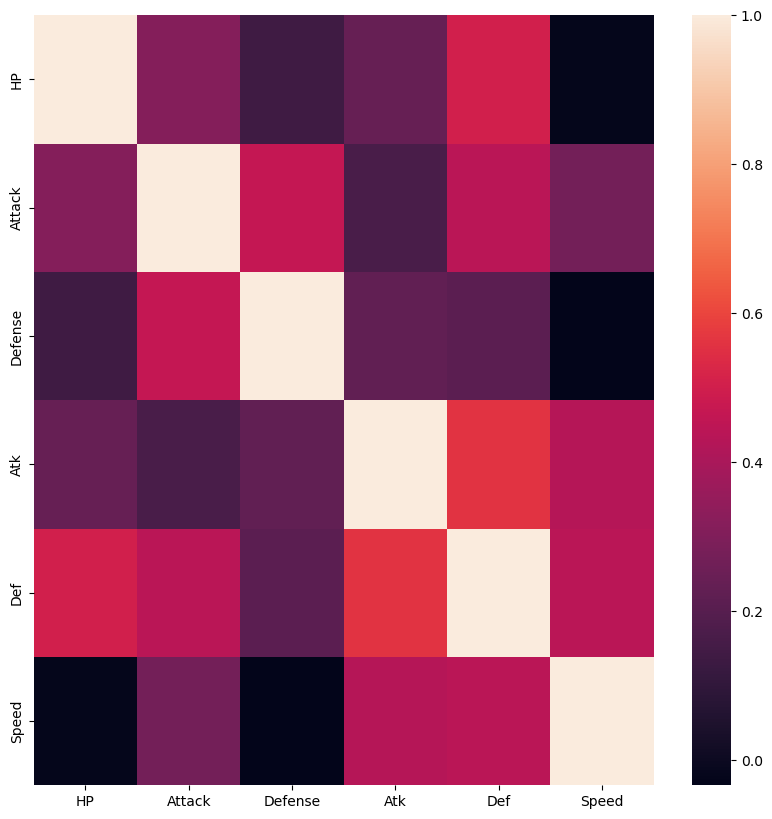

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

<Axes: >

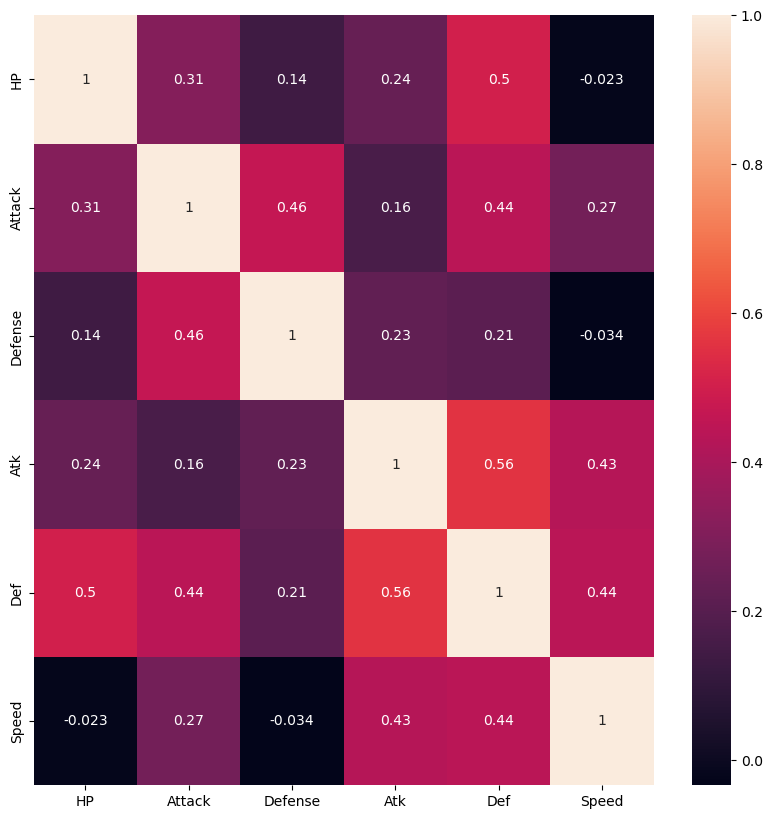

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

## Univariate Analysis(distplot, boxplot, kdeplot)

/var/folders/jx/cc9brgl143z9wt4bc65wylz40000gn/T/ipykernel_48025/1284155708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(limited_column_pokemon_data[0:151]['Defense'])


<Axes: xlabel='Defense', ylabel='Density'>

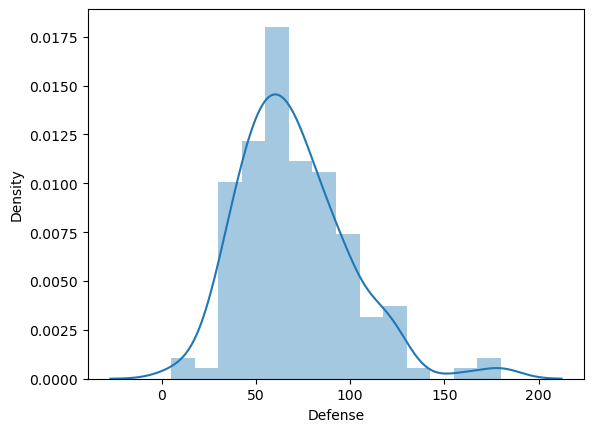

In [73]:
sns.distplot(limited_column_pokemon_data[0:151]['Defense'])

<Axes: ylabel='Defense'>

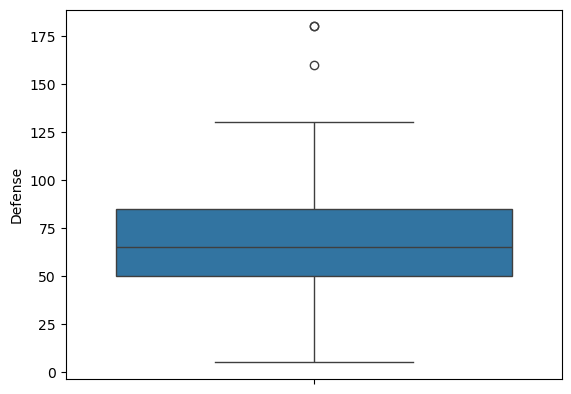

In [74]:
sns.boxplot(limited_column_pokemon_data[0:151]['Defense'])

/var/folders/jx/cc9brgl143z9wt4bc65wylz40000gn/T/ipykernel_48025/337982424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(limited_column_pokemon_data[0:151]['Defense'], kde=False)


<Axes: xlabel='Defense'>

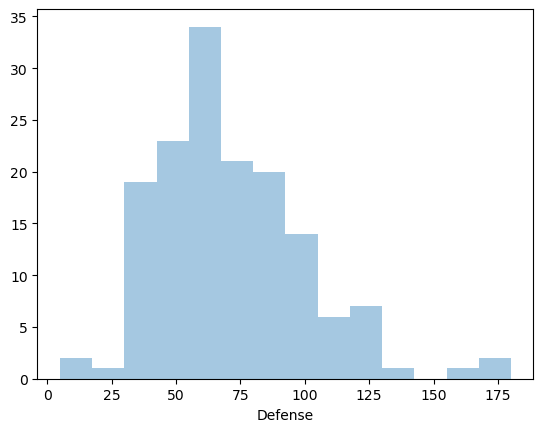

In [75]:
sns.distplot(limited_column_pokemon_data[0:151]['Defense'], kde=False)

<Axes: xlabel='Defense', ylabel='Density'>

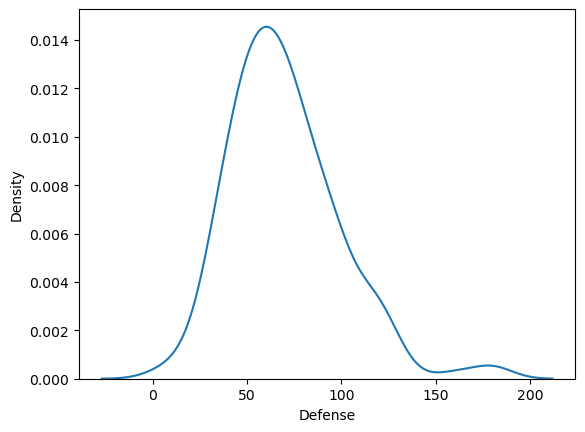

In [76]:
sns.kdeplot(limited_column_pokemon_data[0:151]['Defense'])

<Axes: xlabel='Defense', ylabel='Density'>

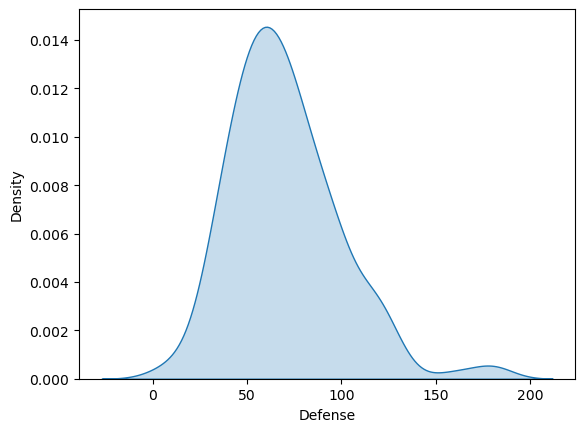

In [78]:
sns.kdeplot(limited_column_pokemon_data[0:151]['Defense'], fill=True)

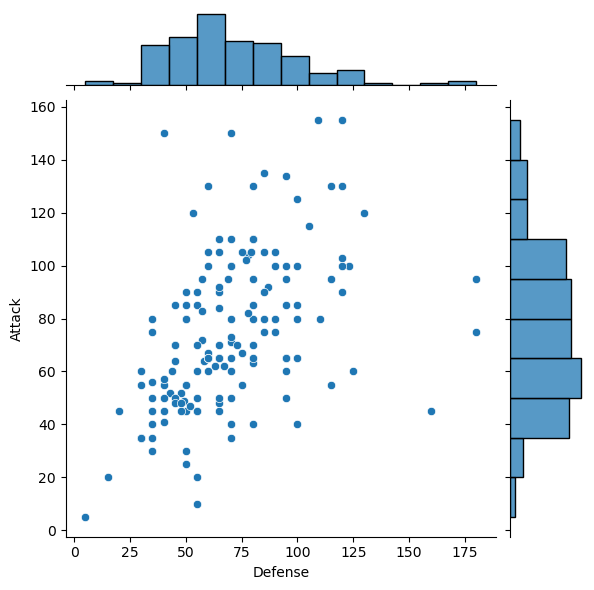

In [83]:
sns.jointplot(x = 'Defense', y = 'Attack', data=limited_column_pokemon_data[0:151])

In [85]:
limited_column_pokemon_data[0:151][['Defense', 'Attack']].corr()

,Defense,Attack
Defense,1.000000,0.464479
Attack,0.464479,1.000000


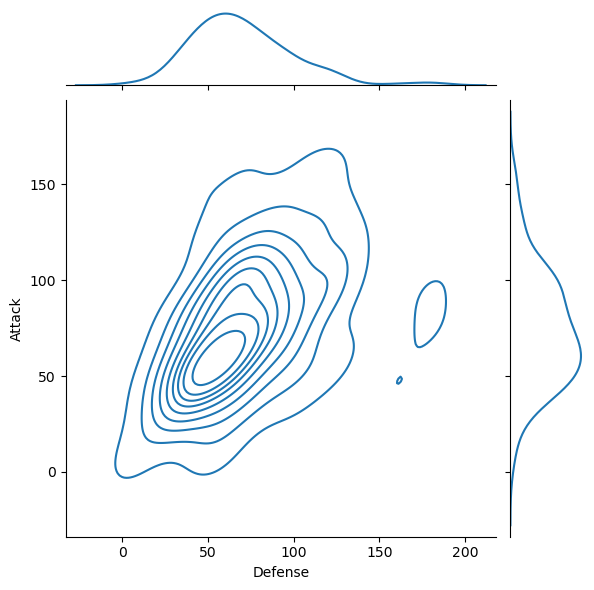

In [86]:
sns.jointplot(x = 'Defense', y = 'Attack', data=limited_column_pokemon_data[0:151], kind='kde')

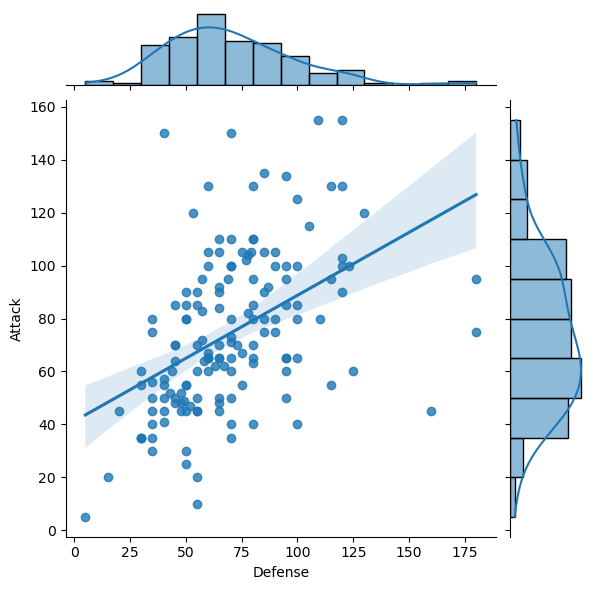

In [87]:
sns.jointplot(x = 'Defense', y = 'Attack', data=limited_column_pokemon_data[0:151], kind='reg')

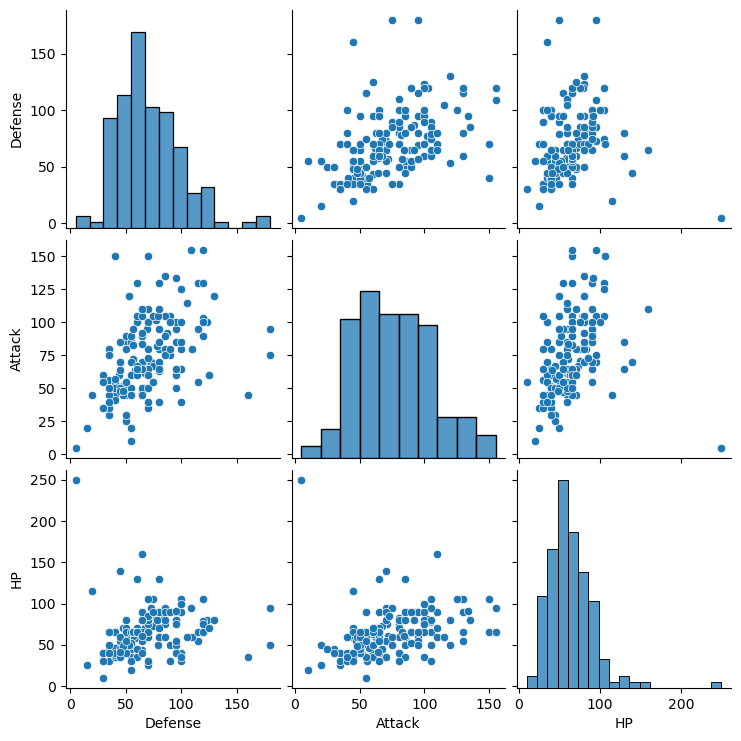

In [88]:
sns.pairplot(limited_column_pokemon_data[0:151][['Defense', 'Attack', 'HP']], kind='scatter')

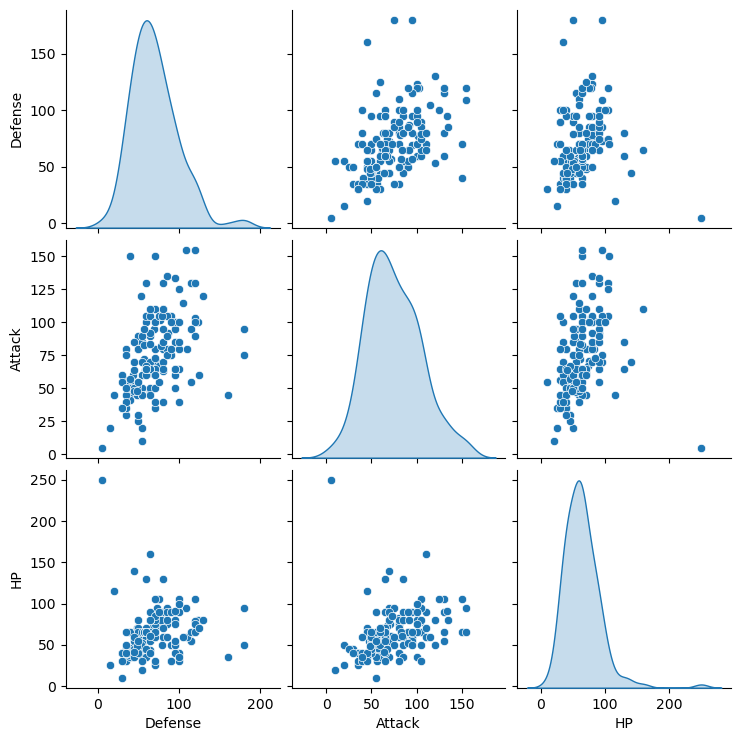

In [89]:
sns.pairplot(limited_column_pokemon_data[0:151][['Defense', 'Attack', 'HP']], kind='scatter', diag_kind='kde')

### Categorical Data Visualization

In [90]:
raw_file_path = '/Users/vishalsaxena/Documents/DS_Workspace/ds_bootcamp/data/raw/Automobile.csv'
data = pd.read_csv(raw_file_path)
data.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


<Axes: xlabel='number_of_doors', ylabel='horsepower'>

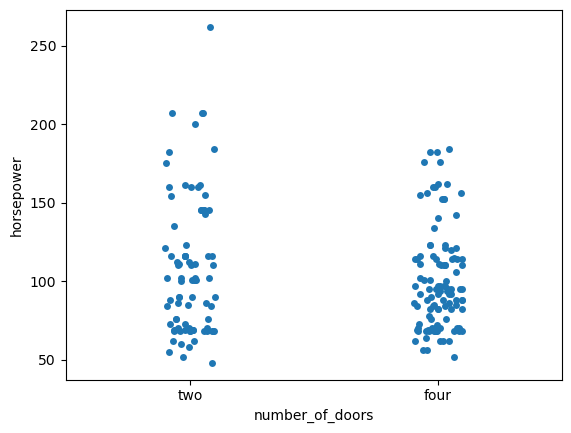

In [92]:
sns.stripplot(x='number_of_doors', y ='horsepower', data=data)

<Axes: xlabel='number_of_doors', ylabel='horsepower'>

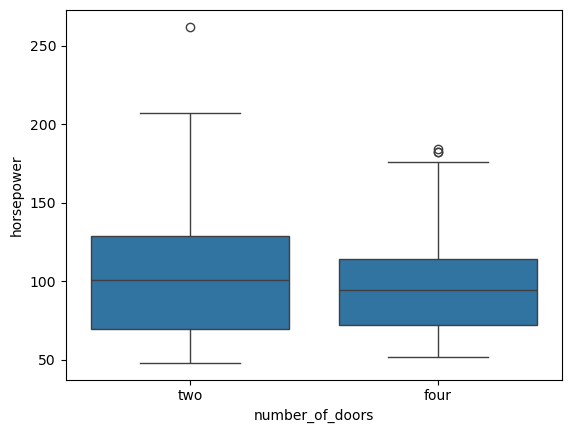

In [94]:
sns.boxplot(x='number_of_doors', y ='horsepower', data=data)

<Axes: xlabel='number_of_doors', ylabel='horsepower'>

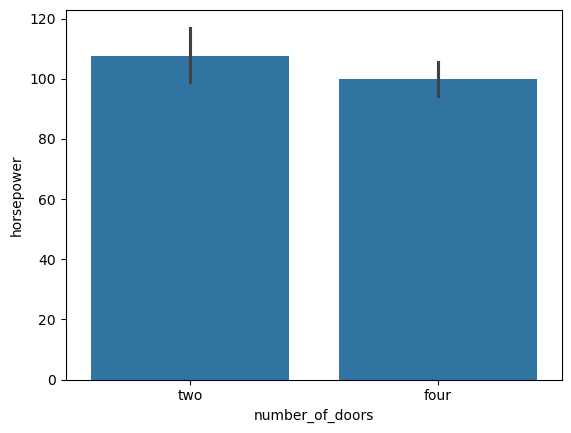

In [95]:
sns.barplot(x='number_of_doors', y ='horsepower', data=data)

<Axes: xlabel='count', ylabel='fuel_type'>

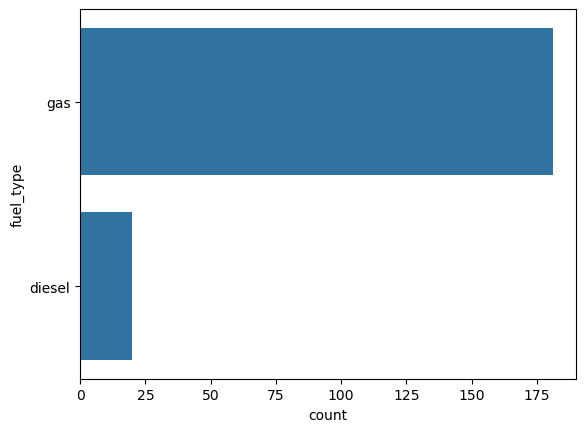

In [96]:
sns.countplot(data['fuel_type'])